In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

class Attractor(object):
    def __init__(self, s=10, p=28., b=8.0/3.0, start=0.0, end=80.0, points=10000):
        self.arbitrary = 10000
        self.params = np.array([s, p, b])
        self.points = points
        self.end = end
        self.start = start
        self.t = np.linspace(self.start, self.end, self.points+1, endpoint=True)
        self.dt = (self.end - self.start) / self.points
        self.solution = None

    def euler(self, nparray=np.array([])):
        """Calculates the simplest euler increment.

        @param: nparray: a numpy array containing values [x,y,z]
        @return: a numpy array form of the simplest euler increment
        """
        # print arbitrary
        k1 = [0] * 3
        k1[0] = self.params[0] * (nparray[1] - nparray[0])
        k1[1] = nparray[0] * (self.params[1] - nparray[2]) - nparray[1]
        k1[2] = (nparray[0] * nparray[1]) - (self.params[2] * nparray[2])

        return np.array(k1)

    def rk2(self, nparray=np.array([])):
        """Calculates the 2nd order Runge-kutta increment.

        @param: nparray:  a numpy array containing values [x,y,z]
        @return: k2, a numpy array form of the 2nd order Runge-kutta increment
        """
        k1 = self.euler(nparray)
        k2 = [0] * 3

        # change over time
        xt = nparray[0] + k1[0] * self.dt / 2
        yt = nparray[1] + k1[1] * self.dt / 2
        zt = nparray[2] + k1[2] * self.dt / 2
        nparray2 = np.array([xt, yt, zt])

        k2[0] = self.params[0] * (nparray2[1] - nparray2[0])
        k2[1] = nparray2[0] * (self.params[1] - nparray[2]) - nparray[1]
        k2[2] = nparray2[0] * nparray2[1] - self.params[2] * nparray2[2]

        return k2

    def rk4(self, nparray=np.array([])):
        """Calculates the 4th order Runge-kutta increment.

        @param: nparray:  a numpy array containing values [x,y,z]
        @return: k4, a numpy array form of the 4th order Runge-kutta increment
        """
        k2 = self.rk2(nparray)
        k3 = [0] * 3
        k4 = [0] * 3

        # change over time
        xt = nparray[0] + k2[0] * self.dt / 2
        yt = nparray[1] + k2[1] * self.dt / 2
        zt = nparray[2] + k2[2] * self.dt / 2
        nparray2 = np.array([xt, yt, zt])

        k3[0] = self.params[0] * (nparray2[1] - nparray2[0])
        k3[1] = (nparray2[0] * (self.params[1] - nparray2[2]) - nparray2[1])
        k3[2] = nparray2[0] * nparray2[1] - self.params[2] * nparray2[2]

        # change over time
        xt = nparray[0] + k3[0] * self.dt
        yt = nparray[1] + k3[1] * self.dt
        zt = nparray[2] + k3[2] * self.dt
        nparray2 = np.array([xt, yt, zt])

        k4[0] = self.params[0] * (nparray2[1] - nparray2[0])
        k4[1] = (nparray2[0] * (self.params[1] - nparray2[2]) - nparray2[1])
        k4[2] = nparray2[0] * nparray2[1] - self.params[2] * nparray2[2]

        return k4

    def evolve(self, r0=np.array([0.1,0.0,0.0]), order=4):
        """Generates a pandas DataFrame wrt order specified.

        @param: r0:  a numpy array containing values [x0,y0,z0]
        @return: self.solution, a pandas DataFrame object
        """
        x=np.zeros(self.points+1)
        y=np.zeros(self.points+1)
        z=np.zeros(self.points+1)
        x[0] = r0[0]
        y[0] = r0[1]
        z[0] = r0[2]
        i=1

        if order == 1:
            while i < self.points+1:
                inc = self.euler(np.array([x[i-1], y[i-1], z[i-1]]))
                x[i] = x[i - 1] + inc[0] * self.dt
                y[i] = y[i - 1] + inc[1] * self.dt
                z[i] = z[i - 1] + inc[2] * self.dt
                i += 1

        elif order == 2:
            while i < self.points+1:
                inc = self.rk2(np.array([x[i-1], y[i-1], z[i-1]]))
                x[i] = x[i - 1] + 2*inc[0] * self.dt
                y[i] = y[i - 1] + 2*inc[1] * self.dt
                z[i] = z[i - 1] + 2*inc[2] * self.dt
                i += 1

        elif order==4:
            while i < self.points+1:
                inc = self.rk4(np.array([x[i-1], y[i-1], z[i-1]]))
                x[i] = x[i - 1] + inc[0] * self.dt
                y[i] = y[i - 1] + inc[1] * self.dt
                z[i] = z[i - 1] + inc[2] * self.dt
                i += 1

        self.solution = pd.DataFrame.transpose(
            pd.DataFrame(data=[self.t, x, y, z], index=['t', 'x', 'y', 'z']))

        return self.solution

    def save(self, filename=None):
        filename = filename or 'solution.csv'
        self.solution.to_csv(filename)

    def plotx(self):
        """Generates 2d plot of x(t)."""
        plot.plot(self.solution['t'], self.solution['x'])
        plot.show()

    def ploty(self):
        """Generates 2d plot of y(t)."""
        plot.plot(self.solution['t'], self.solution['y'])
        plot.show()

    def plotz(self):
        """Generates 2d plot of z(t)."""
        plot.plot(self.solution['t'], self.solution['z'])
        plot.show()

    def plot3d(self):
        """Generates 3d plot of x(t), y(t), z(t)."""
        fig = plot.figure()
        plt = fig.add_subplot(111, projection='3d')
        plt.scatter(
            self.solution['x'], self.solution['y'], self.solution['z'])
        plot.show()


In [2]:
obj=Attractor()
obj.euler([1,0,1])

array([-10.        ,  27.        ,  -2.66666667])

In [3]:
obj=Attractor()
obj.rk2([1,0,1])

[-8.5199999999999996, 25.919999999999998, -2.534542222222222]

In [4]:
obj=Attractor()
obj.rk4([1,0,1])

[-7.2313317871925475, 24.948588485301645, -2.4189432879591379]

In [5]:
obj.evolve()

,t,x,y,z
0,0.000,0.100000,0.000000,0.000000
1,0.008,0.094274,0.020689,0.000016
2,0.016,0.090404,0.040384,0.000044
3,0.024,0.088211,0.059461,0.000085
4,0.032,0.087554,0.078261,0.000136
5,0.040,0.088322,0.097097,0.000200
6,0.048,0.090439,0.116267,0.000278
7,0.056,0.093851,0.136052,0.000371
8,0.064,0.098529,0.156726,0.000484
9,0.072,0.104467,0.178558,0.000619


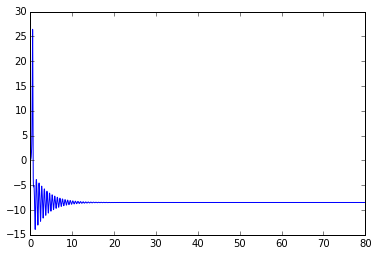

In [7]:
obj.ploty()